# Sprint 06
## Dividir el conjunto de datos
Utilizaremos un 70% de los datos para entrenar nuestro modelo. Se necesita una gran cantidad de datos para entrenar el modelo, ya que tiene que relacionar variables y aprender patrones. Cuanto mayor número de datos proporcionemos, mejor será el modelo (siempre y cuando no haya overfitting).
Por otro lado, utilizaremos el 30% de los datos para testear el modelo. Es fundamental no utilizar estos datos para entrenar el modelo para ver si nuestro algoritmo tiene un buen deswempeño en datos no entrenados.

In [106]:
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv('bank_dataset.csv')

X = data.drop('deposit', axis=1)  # características
y = data['deposit'] # objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Para ahorrarme futuros dolores de cabeza, transformamos los valores nulos

In [107]:
# Preguntar
print("Tenemos valores nulos?")
print(data.isna().sum())

# Solucionar
for column in data.columns:
    if data[column].dtype in ['float64', 'int64']:  #columna numérica
        media = data[column].mean()  #media
        data[column] = data[column].fillna(media)  #reemplazar
    else:  #categórica
        moda = data[column].mode().iloc[0]  #moda
        data[column] = data[column].fillna(moda)  #reemplazar

# Confirmar
print("\nTenemos valores nulos?")
print(data.isna().sum())

Tenemos valores nulos?
age          10
job           0
marital       5
education     7
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

Tenemos valores nulos?
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


 ## Codificar variables categóricas
 Como no podemos utilizar variables categóricas con texto, tenemos que codificarlas.
 Podemos clasificar nuestras variables categóricas como: 
 1. Ordinales: tienen un orden narutal (una jerarquía) --> Usamos label encoding
 2. Nominales: no tienen orden natural y no se interpretan como valores numéricos --> Usamos one hot encoding
 3. Booleanas: son de 'sí' o 'no' --> Usamos label encoding

#### Categóricas ordinales
Para las variables categóricas ordinales, como "education", podemos asignar un número a cada categoria.
Podemos utilizar LabelEncoder.

In [108]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['education'] = label_encoder.fit_transform(data['education'])
print(data['education'])

0        1
1        1
2        1
3        1
4        2
        ..
11157    0
11158    1
11159    1
11160    1
11161    1
Name: education, Length: 11162, dtype: int32


#### Categóricas nominales
Por otro lado, tenemos variables categóricas nominales, como el tipo de trabajo, para lo que vamos a utilizar el One-hot encoding

In [109]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)  # Usar sparse_output=False para obtener una matriz densa
job_encoded = encoder.fit_transform(data[['job']])
marital_encoded = encoder.fit_transform(data[['marital']])
contact_encoded = encoder.fit_transform(data[['contact']])
month_encoded = encoder.fit_transform(data[['month']])
poutcome_encoded = encoder.fit_transform(data[['poutcome']])

data['job'] = encoder.fit_transform(data[['job']])
data['marital'] = encoder.fit_transform(data[['marital']])
data['contact'] = encoder.fit_transform(data[['contact']])
data['month'] = encoder.fit_transform(data[['month']])
data['poutcome'] = encoder.fit_transform(data[['poutcome']])

# Printamos un ejemplo: job
print("JOB by OneHotEncoder: ")
print(data['job'])
print("MARITAL by OneHotEncoder: ")
print(data['marital'])
print("MARITAL by OneHotEncoder: ")
print(data['marital'])

JOB by OneHotEncoder: 
0        1.0
1        1.0
2        0.0
3        0.0
4        1.0
        ... 
11157    0.0
11158    0.0
11159    0.0
11160    0.0
11161    0.0
Name: job, Length: 11162, dtype: float64
MARITAL by OneHotEncoder: 
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
11157    0.0
11158    0.0
11159    0.0
11160    0.0
11161    0.0
Name: marital, Length: 11162, dtype: float64
MARITAL by OneHotEncoder: 
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
11157    0.0
11158    0.0
11159    0.0
11160    0.0
11161    0.0
Name: marital, Length: 11162, dtype: float64


#### Categóricas booleanas
Y por último tenemos las variables booleanas

In [110]:
data['default'] = data['default'].map({'yes': 1, 'no': 0})
data['housing'] = data['housing'].map({'yes': 1, 'no': 0})
data['loan'] = data['loan'].map({'yes': 1, 'no': 0})
data['deposit'] = data['deposit'].map({'yes': 1, 'no': 0})

## Estandarización de características
Objetivo: que las variables numéricas tengan de media cero y desviación estándar uno.

Variables: age, balance, day, duration, campaign, pdays, previous.

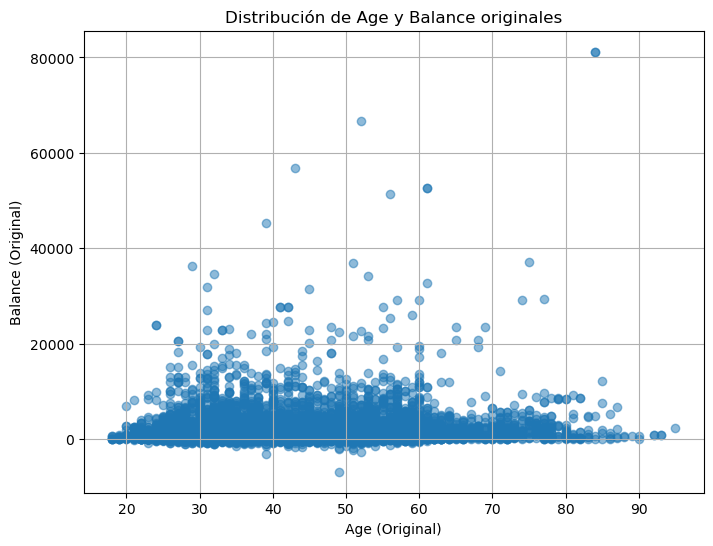

        age  job  marital  education  default   balance  housing  loan  \
0  1.491689  1.0      0.0          1        0  0.252525        1     0   
1  1.239780  1.0      0.0          1        0 -0.459974        0     0   
2 -0.019765  0.0      0.0          1        0 -0.080160        1     0   
3  1.155810  0.0      0.0          1        0  0.293762        1     0   
4  1.071841  1.0      0.0          2        0 -0.416876        0     0   

   contact       day  month  duration  campaign     pdays  previous  poutcome  \
0      0.0 -1.265746    0.0  1.930226 -0.554168 -0.481184  -0.36326       0.0   
1      0.0 -1.265746    0.0  3.154612 -0.554168 -0.481184  -0.36326       0.0   
2      0.0 -1.265746    0.0  2.929901 -0.554168 -0.481184  -0.36326       0.0   
3      0.0 -1.265746    0.0  0.596366 -0.554168 -0.481184  -0.36326       0.0   
4      0.0 -1.265746    0.0  0.867171 -0.186785 -0.481184  -0.36326       0.0   

   deposit  
0        1  
1        1  
2        1  
3        1  
4  

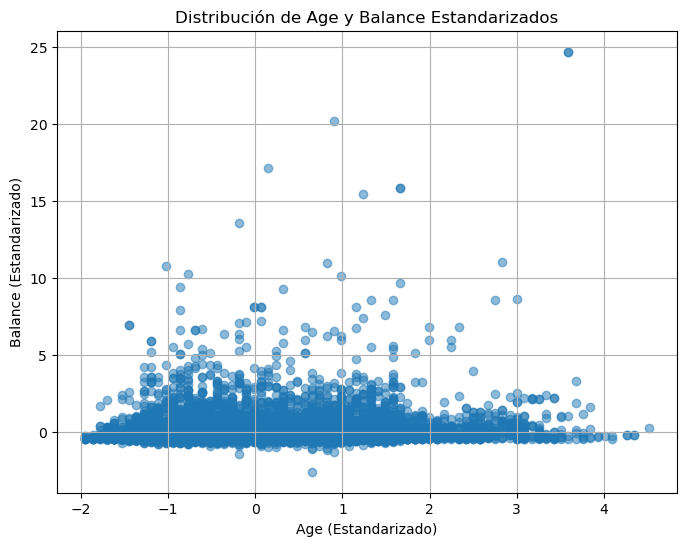

In [111]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Ponemos el ejemplo de age y balance para visualizarlo ANTES de la estandarización
plt.figure(figsize=(8,6))
plt.scatter(data['age'], data['balance'], alpha=0.5)
plt.xlabel('Age (Original)')
plt.ylabel('Balance (Original)')
plt.title('Distribución de Age y Balance originales')
plt.grid(True)
plt.show()

# Selección
numeric_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

scaler = StandardScaler() #creamos objeto
data[numeric_columns] = scaler.fit_transform(data[numeric_columns]) #tranformamos
print(data.head())

# Ponemos el ejemplo de age y balance para visualizarlo DESPUÉS de la estandarización
plt.figure(figsize=(8,6))
plt.scatter(data['age'], data['balance'], alpha=0.5)
plt.xlabel('Age (Estandarizado)')
plt.ylabel('Balance (Estandarizado)')
plt.title('Distribución de Age y Balance Estandarizados')
plt.grid(True)
plt.show()


## Reducción de la dimensionalidad
Objetivo: Reducir el número de columnas de datos pero sin eliminar información relevante.

Metodolgía: PCA (Principal Component Analysis).

#### Matriz de covarianza

        age  job  marital  education  default   balance  housing  loan  \
0  1.491689  1.0      0.0          1        0  0.252525        1     0   
1  1.239780  1.0      0.0          1        0 -0.459974        0     0   
2 -0.019765  0.0      0.0          1        0 -0.080160        1     0   
3  1.155810  0.0      0.0          1        0  0.293762        1     0   
4  1.071841  1.0      0.0          2        0 -0.416876        0     0   

   contact       day  month  duration  campaign     pdays  previous  poutcome  \
0      0.0 -1.265746    0.0  1.930226 -0.554168 -0.481184  -0.36326       0.0   
1      0.0 -1.265746    0.0  3.154612 -0.554168 -0.481184  -0.36326       0.0   
2      0.0 -1.265746    0.0  2.929901 -0.554168 -0.481184  -0.36326       0.0   
3      0.0 -1.265746    0.0  0.596366 -0.554168 -0.481184  -0.36326       0.0   
4      0.0 -1.265746    0.0  0.867171 -0.186785 -0.481184  -0.36326       0.0   

   deposit  
0        1  
1        1  
2        1  
3        1  
4  

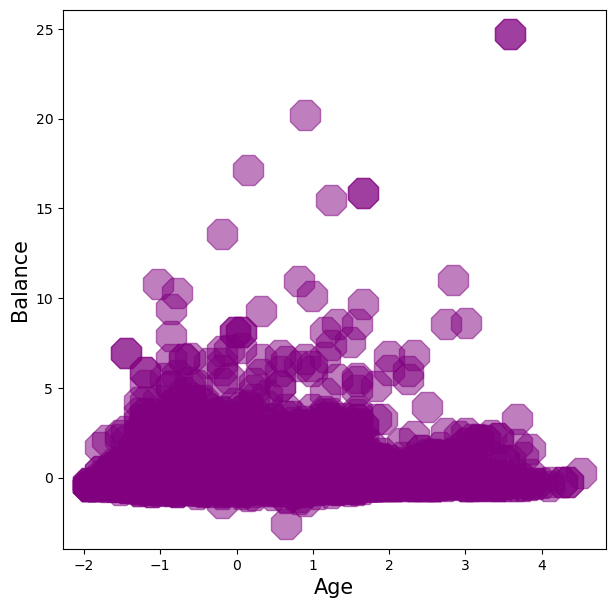

In [120]:
from sklearn.decomposition import PCA

numeric_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

scaler = StandardScaler() #creamos objeto
data[numeric_columns] = scaler.fit_transform(data[numeric_columns]) #tranformamos
print(data.head())

# Ponemos el ejemplo de "age" contra "balance", pero en realidad  hemos transformado todas las columnas numéricas
plt.figure(figsize=(7, 7))
plt.scatter(data["age"], data["balance"], 
            marker="8", s=550, color="purple", alpha=0.5)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Balance", fontsize=15)
plt.show()

#### Eigenvalores y eigenvectores: Aplicar PCA
Ahora que ya tenemos el DataFrame completamente preprocesado y las variables numéricas estandarizadas, aplicamos PCA con 2 componentes principales para la visualización.

Los eigenvectores indican las direcciones principales de máxima varianza, y se visualizan como flechas.

Los eigenvalores representan la varianza por cada componente pricipal. 


Eigenvalores (Varianza explicada por cada componente): [1.60023597 1.12607354]
Componentes principales (Eigenvectores): [[ 2.95783205e-02  5.90826897e-02 -2.05263382e-01 -3.63440508e-02
  -2.25702740e-01  6.74223414e-01  6.48221690e-01 -4.90845984e-03
   1.13649841e-02 -1.17503832e-02  1.08790288e-02 -5.18856367e-03
   8.20645551e-02  1.24985119e-02  1.38357179e-01]
 [ 7.02428374e-01  6.81797536e-01  3.23472713e-02  1.42723916e-01
  -5.32366164e-02 -6.08691110e-02 -2.20245498e-02 -5.42251776e-03
  -9.68862180e-02 -2.76141657e-02 -2.42173088e-02  3.83570252e-02
  -2.74365085e-02 -6.72234939e-04 -1.77744680e-02]]


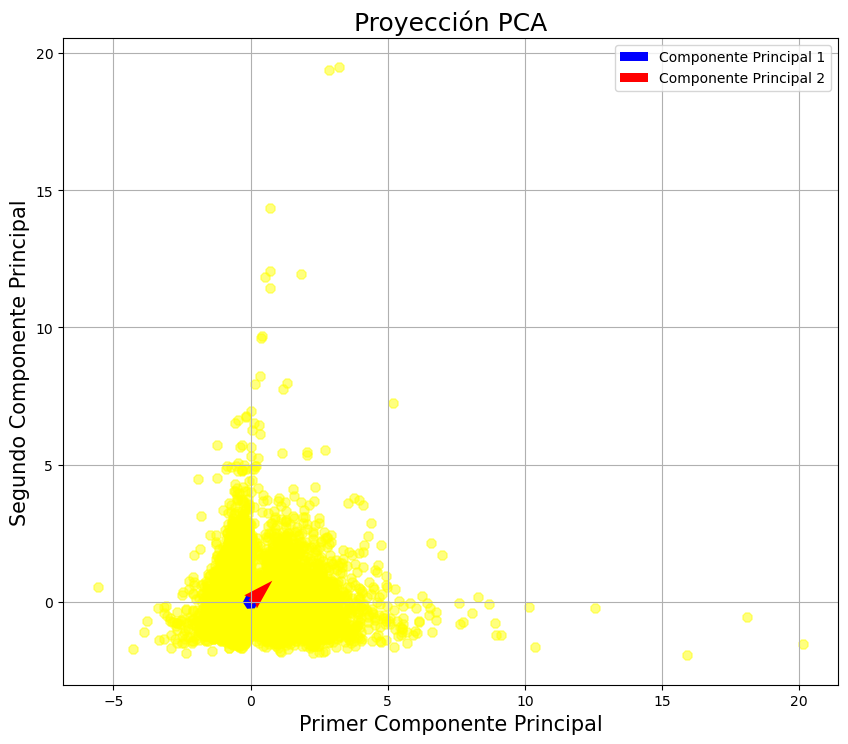

In [124]:
# Asegúrate de usar solo columnas numéricas, aunque ahora teóricamente deberían serlas todas
all_numeric_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'default', 'housing', 'loan', 'job', 'marital', 'contact', 'month', 'poutcome']
data_numeric = data[all_numeric_columns]

# Aplicar PCA
pca = PCA(n_components=2)  # Reducir a 2 dimensiones
pca_result = pca.fit_transform(data_numeric)  # Aplicar PCA

# Eigenvalores y eigenvectores
valores = pca.explained_variance_  # Varianza explicada por cada componente
vectores = pca.components_  # Componentes principales (eigenvectores)

# Imprimir resultados
print("Eigenvalores (Varianza explicada por cada componente):", valores)
print("Componentes principales (Eigenvectores):", vectores)

# Visualización
plt.figure(figsize=(10, 10))
ax = plt.gca()
ax.set_aspect("equal")

# Graficar los primeros dos componentes principales
plt.scatter(pca_result[:, 0], pca_result[:, 1], marker="8", s=50, color="yellow", alpha=0.5)

# Graficar los eigenvectores (componentes principales)
plt.quiver(0, 0, vectores[0, 0] * valores[0], vectores[0, 1] * valores[0],
           color="blue", angles="xy", scale_units="xy", scale=1, width=0.02, label="Componente Principal 1")
plt.quiver(0, 0, vectores[1, 0] * valores[1], vectores[1, 1] * valores[1],
           color="red", angles="xy", scale_units="xy", scale=1, width=0.02, label="Componente Principal 2")

# Etiquetas
plt.xlabel("Primer Componente Principal", fontsize=15)
plt.ylabel("Segundo Componente Principal", fontsize=15)
plt.title("Proyección PCA", fontsize=18)
plt.legend()
plt.grid()
plt.show()

Otra opción hubiese sido aplicar la función eig.

```ssh

#Matriz de covarianza

cov_matrix = np.cov(data_scaled.T)


#Eigenvalores y eigenvectores

valores, vectores = eig(cov_matrix)


#Seleccionamos eigenvectores

vector_azul = vectores[:, 0]

vector_rojo = vectores[:, 1]

print("Eigenvector Rojo:", vector_rojo, "Eigenvalor:", valores[1])

print("Eigenvector Azul:", vector_azul, "Eigenvalor:", valores[0])

```


#### Proyección de datos

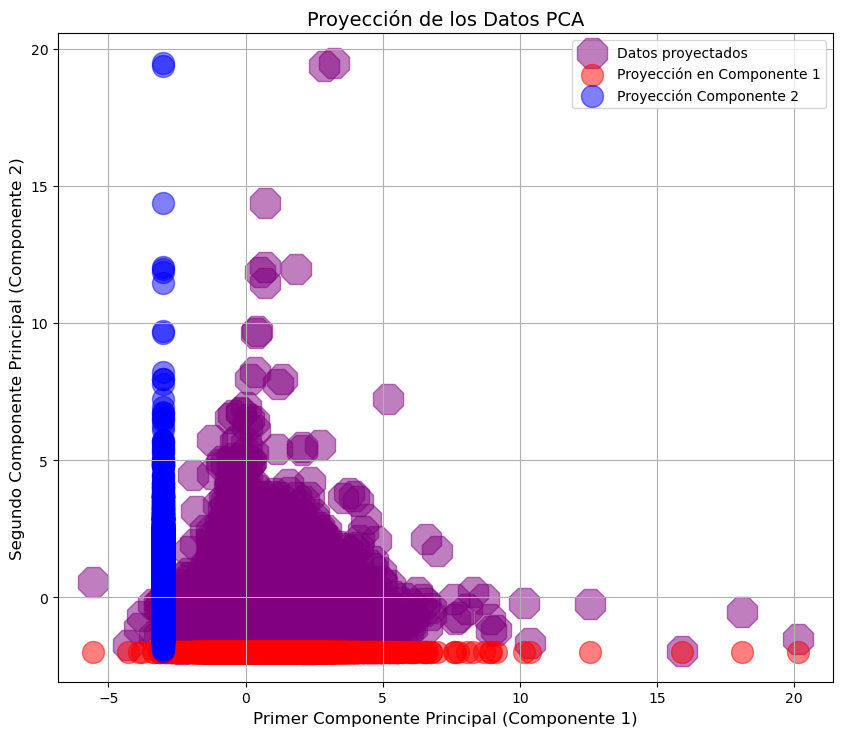

In [129]:
# creamos un dataFrame con dos dimensiones
proyectados = pd.DataFrame(pca_result, columns=["Componente 1", "Componente 2"])
plt.figure(figsize=(10, 10))
ax = plt.gca()
ax.set_aspect("equal")

plt.scatter(proyectados["Componente 1"], proyectados["Componente 2"],
            marker="8", s=550, color="purple", alpha=0.5, label="Datos proyectados")

# Proyección de los datos en el eje 1 (ingreso)
plt.scatter(proyectados["Componente 1"], [-2]*len(proyectados["Componente 1"]),
            s=250, color="red", alpha=0.5, label="Proyección en Componente 1")

# Proyección de los datos en el eje 2 (horas trabajadas)
plt.scatter([-3]*len(proyectados["Componente 2"]), proyectados["Componente 2"],
            s=250, color="blue", alpha=0.5, label="Proyección Componente 2")

# Ajustes de la gráfica
plt.xlabel("Primer Componente Principal (Componente 1)", fontsize=12)
plt.ylabel("Segundo Componente Principal (Componente 2)", fontsize=12)
plt.title("Proyección de los Datos PCA", fontsize=14)
plt.legend()
plt.grid()
plt.show()

In [ ]:
# DataFrame con los datos proyectados en los dos primeros componentes
proyectados = pd.DataFrame(pca_result, columns=["Componente 1", "Componente 2"])

# Crear la figura
plt.figure(figsize=(10, 10))
ax = plt.gca()
ax.set_aspect("equal")

# Graficar los datos proyectados en los primeros dos componentes principales
plt.scatter(proyectados["Componente 1"], proyectados["Componente 2"],
            marker="8", s=50, color="purple", alpha=0.5, label="Datos proyectados")

# Opcionalmente, si deseas agregar las proyecciones de los datos en los ejes individuales,
# puedes proyectar puntos en las dimensiones originales de PCA como un tipo de "referencia".
# Proyección de los datos en el eje 1 (Componente 1)
plt.scatter(proyectados["Componente 1"], [-2]*len(proyectados["Componente 1"]),
            s=250, color="red", alpha=0.5, label="Proyección en Componente 1")

# Proyección de los datos en el eje 2 (Componente 2)
plt.scatter([-3]*len(proyectados["Componente 2"]), proyectados["Componente 2"],
            s=250, color="blue", alpha=0.5, label="Proyección Componente 2")

# Etiquetas y ajustes
plt.xlabel("Primer Componente Principal (Componente 1)", fontsize=12)
plt.ylabel("Segundo Componente Principal (Componente 2)", fontsize=12)
plt.title("Proyección de los Datos PCA", fontsize=14)
plt.legend()
plt.grid()
plt.show()

#### Seleccionar los componentes
Como tenemos un conjunto muy grande de datos, no solamente vamos a poner el componente 1 y el componente 2.
Por ese motivo en la función fit_transform() añadimos data_numeric, que son todas nuestras variables ahora numéricas y estandarizadas.

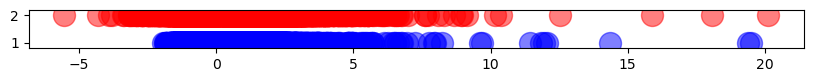

Varianza explicada por cada componente: [1.60023597 1.12607354 1.11457419 0.98086173 0.89071431 0.86079599
 0.49985456 0.26694243 0.1629372  0.11436147 0.10262399 0.09646076
 0.07099444 0.05911654 0.01462718]
Proporción de varianza explicada por cada componente: [0.20100502 0.14144566 0.14000123 0.12320566 0.11188228 0.10812425
 0.06278654 0.03353053 0.02046648 0.0143649  0.01289056 0.0121164
 0.00891758 0.00742561 0.00183731]


In [125]:
pca = PCA()
datos = pca.fit_transform(data_numeric)

# Código de visualización
plt.figure(figsize=(10, 10))
plt.axes().set_aspect("equal")
plt.scatter(datos[:, 0], [2]*datos[:, 0].size, s=250, color="red", alpha=0.5)
plt.scatter(datos[:, 1], [1]*datos[:, 1].size, s=250, color="blue", alpha=0.5)
plt.ylim((0.8, 2.2))
plt.show()
print("Varianza explicada por cada componente:", pca.explained_variance_)
print("Proporción de varianza explicada por cada componente:", pca.explained_variance_ratio_)

In [ ]:
Ahora me interesa saber cuántos componentes principales quiero calcular.

In [126]:
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
print("Varianza explicada por cada componente:", explained_variance)
print("Proporción de varianza explicada por cada componente:", explained_variance_ratio)

Varianza explicada por cada componente: [1.60023597 1.12607354 1.11457419 0.98086173 0.89071431 0.86079599
 0.49985456 0.26694243 0.1629372  0.11436147 0.10262399 0.09646076
 0.07099444 0.05911654 0.01462718]
Proporción de varianza explicada por cada componente: [0.20100502 0.14144566 0.14000123 0.12320566 0.11188228 0.10812425
 0.06278654 0.03353053 0.02046648 0.0143649  0.01289056 0.0121164
 0.00891758 0.00742561 0.00183731]


Y finalmente se debe evaluar la proporción acumulada de varianza explicada con el objetivo de saber cuántos componentes debería conservar.
Por ejemplo, si hay un pequeño conjunto de componentes que explica la mayor parte de la varianza, puedo ignorar el resto.

In [128]:
# Proporción de varianza
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
print("Proporción acumulada de varianza explicada:", cumulative_variance_ratio)

# Elegir el número de componentes que expliquen el 70% de la varianza
n_components = np.argmax(cumulative_variance_ratio >= 0.7) + 1
print(f"Conservaremos los primeros {n_components} componentes principales.")

Proporción acumulada de varianza explicada: [0.20100502 0.34245068 0.48245191 0.60565757 0.71753984 0.82566409
 0.88845063 0.92198116 0.94244764 0.95681254 0.9697031  0.9818195
 0.99073708 0.99816269 1.        ]
Conservaremos los primeros 5 componentes principales.


## Conclusiones
El PCA está diseñado para trabajar con conjuntos de datos de alta dimensionalidad de manera automática.

Todas las variables deben ser numéricas y escaladas. 

Los datos resultantes representan la cantidad de varianza total en los datos.

La proporción para un componente es:

PC1 = Varianza PC1 / Varianza total = 1.6 / 7.96 = 0.2

En este caso, el primer componente principal captura el 20.1% de la varianza de los datos. Esto significa que, al proyectar los datos sobre este componente, puedes conservar la mayor parte de la información.

Si decidimos reducir los datos a solo 1 dimensión (PC1), conservaríamos el 20.1% de la información.

Por tanto, el primer componente principal es más importante porque explica más varianza.

Lo ideal sería aplicarlo a todas las variables